K nearest Neighbours

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Data Set

In [2]:
df=pd.read_csv("Data.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x,y)


[[1000025       5       1 ...       3       1       1]
 [1002945       5       4 ...       3       2       1]
 [1015425       3       1 ...       3       1       1]
 ...
 [ 888820       5      10 ...       8      10       2]
 [ 897471       4       8 ...      10       6       1]
 [ 897471       4       8 ...      10       4       1]] [2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2

splitting The Data Set Into training and testing Sets

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [5]:
print(x_train,x_test,y_train,y_test)

[[ 142932       7       6 ...       9      10       2]
 [1120559       8       3 ...       8       9       8]
 [1254538       8      10 ...      10      10       1]
 ...
 [1214092       1       1 ...       1       1       1]
 [1303489       3       1 ...       2       1       1]
 [ 378275      10       9 ...       7       7       1]] [[1173347       1       1 ...       1       1       1]
 [1156017       3       1 ...       2       1       1]
 [ 706426       5       5 ...       4       3       1]
 ...
 [ 764974       5       1 ...       3       1       2]
 [1137156       2       2 ...       7       1       1]
 [1160476       2       1 ...       3       1       1]] [4 4 4 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4
 2 2 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2
 2 2 2 4 4 4 4 2 4 2 4 2 4 4

Features Scalling

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.fit_transform(x_train)

In [7]:
print(x_train,x_test)

[[-1.38219432  0.91903747  0.9407658  ...  2.22576767  2.27129602
   0.24623928]
 [ 0.03390689  1.27578287 -0.04290763 ...  1.82407819  1.94996317
   3.74830911]
 [ 0.22797663  1.27578287  2.25233038 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [ 0.16939025 -1.22143494 -0.69868992 ... -0.98774815 -0.62069958
  -0.33743902]
 [ 0.29888258 -0.50794414 -0.69868992 ... -0.58605867 -0.62069958
  -0.33743902]
 [-1.04129794  1.98927367  1.92443923 ...  1.42238871  1.30729749
  -0.33743902]] [[ 0.48867167 -1.22099312 -0.71283207 ... -1.03668951 -0.59095109
  -0.38057137]
 [ 0.43500423 -0.5226994  -0.71283207 ... -0.60536614 -0.59095109
  -0.38057137]
 [-0.95728655  0.17559433  0.57705453 ...  0.25728061  0.11080333
  -0.38057137]
 ...
 [-0.77597544  0.17559433 -0.71283207 ... -0.17404277 -0.59095109
   0.18044332]
 [ 0.37659559 -0.87184626 -0.39036042 ...  1.55125073 -0.59095109
  -0.38057137]
 [ 0.44881283 -0.87184626 -0.71283207 ... -0.17404277 -0.59095109
  -0.38057137]]


Training the model on the training set

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape((len(y_pred)),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]

Confussion Metrix

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[102   5]
 [  5  59]]


0.9415204678362573

Plotting The Confussion Matrix 

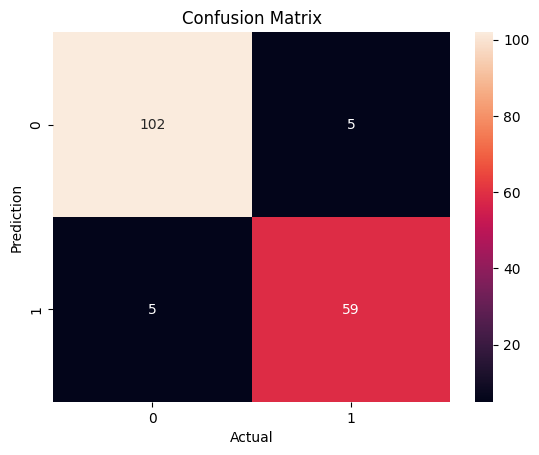

<Figure size 640x480 with 0 Axes>

In [11]:
import seaborn as sns
sns.heatmap(cm,fmt="g",annot=True)
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig("ConfussionMatrix.png")

Classifiction Scores 

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.95      0.95      0.95       107
           4       0.92      0.92      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



Testing For Different Values of k

In [13]:
for i in range(1,20):
    classi=KNeighborsClassifier(n_neighbors=i,p=2,metric="minkowski")
    classi.fit(x_train,y_train)
    y_pred=classi.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    print("K value = ",i)
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("Accuracy Score= ",score)
    

K value =  1
Confusion Matrix
[[104   3]
 [  7  57]]
Classification Report
              precision    recall  f1-score   support

           2       0.94      0.97      0.95       107
           4       0.95      0.89      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy Score=  0.9415204678362573
K value =  2
Confusion Matrix
[[104   3]
 [  8  56]]
Classification Report
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       107
           4       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy Score=  0.935672514619883
K value =  3
Confusion Matrix
[[104   3]
 [  7  57]]
Classification Report
              precision    recall  f1-score   supp